importing neccesary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data Understanding and Exploration

reading in the data

In [98]:
df = pd.read_csv('data/historic_demand_2009_2024_noNaN.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278507,2024-12-05 21:30:00,44,21:30:00,29114,31431,27212,5377,6622,0,17194,0,736,558,758,1003,-450,-531,999,0
278508,2024-12-05 22:00:00,45,22:00:00,27204,29846,25477,5486,6622,0,17194,0,868,-193,263,1002,-450,-531,949,0
278509,2024-12-05 22:30:00,46,22:30:00,26006,28805,24428,5594,6622,0,17194,0,944,-274,211,997,-450,-531,943,0
278510,2024-12-05 23:00:00,47,23:00:00,23908,26825,22590,5575,6622,0,17194,0,864,-404,-77,280,-450,-522,338,0


checking data types

In [99]:
df.dtypes

settlement_date              object
settlement_period             int64
period_hour                  object
nd                            int64
tsd                           int64
england_wales_demand          int64
embedded_wind_generation      int64
embedded_wind_capacity        int64
embedded_solar_generation     int64
embedded_solar_capacity       int64
non_bm_stor                   int64
pump_storage_pumping          int64
ifa_flow                      int64
ifa2_flow                     int64
britned_flow                  int64
moyle_flow                    int64
east_west_flow                int64
nemo_flow                     int64
is_holiday                    int64
dtype: object

In [100]:
df['settlement_date'] = pd.to_datetime(df['settlement_date']) #settlement_date needs to be datetime
df.dtypes

settlement_date              datetime64[ns]
settlement_period                     int64
period_hour                          object
nd                                    int64
tsd                                   int64
england_wales_demand                  int64
embedded_wind_generation              int64
embedded_wind_capacity                int64
embedded_solar_generation             int64
embedded_solar_capacity               int64
non_bm_stor                           int64
pump_storage_pumping                  int64
ifa_flow                              int64
ifa2_flow                             int64
britned_flow                          int64
moyle_flow                            int64
east_west_flow                        int64
nemo_flow                             int64
is_holiday                            int64
dtype: object

In [101]:
missing_values = df.isnull().sum()
print(missing_values)

settlement_date              0
settlement_period            0
period_hour                  0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64


checking for missing data

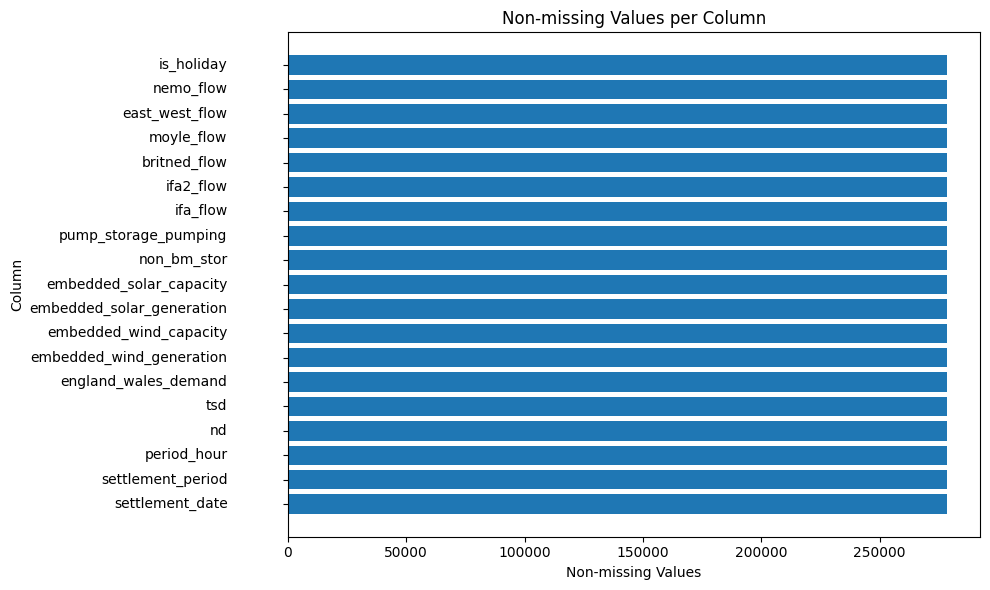

In [102]:
plt.figure(figsize=(10, 6))
plt.barh(missing_values.index, df.notnull().sum().values)
plt.ylabel('Column')
plt.xlabel('Non-missing Values')
plt.yticks(np.arange(len(missing_values.index)), missing_values.index, fontsize=10, va='center', rotation=0)
plt.gca().tick_params(axis='y', pad=40)
plt.title('Non-missing Values per Column')
plt.tight_layout()
plt.show()

preparing data for boxplot

In [103]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_indices = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
    outlier_indices[col] = outliers.tolist()

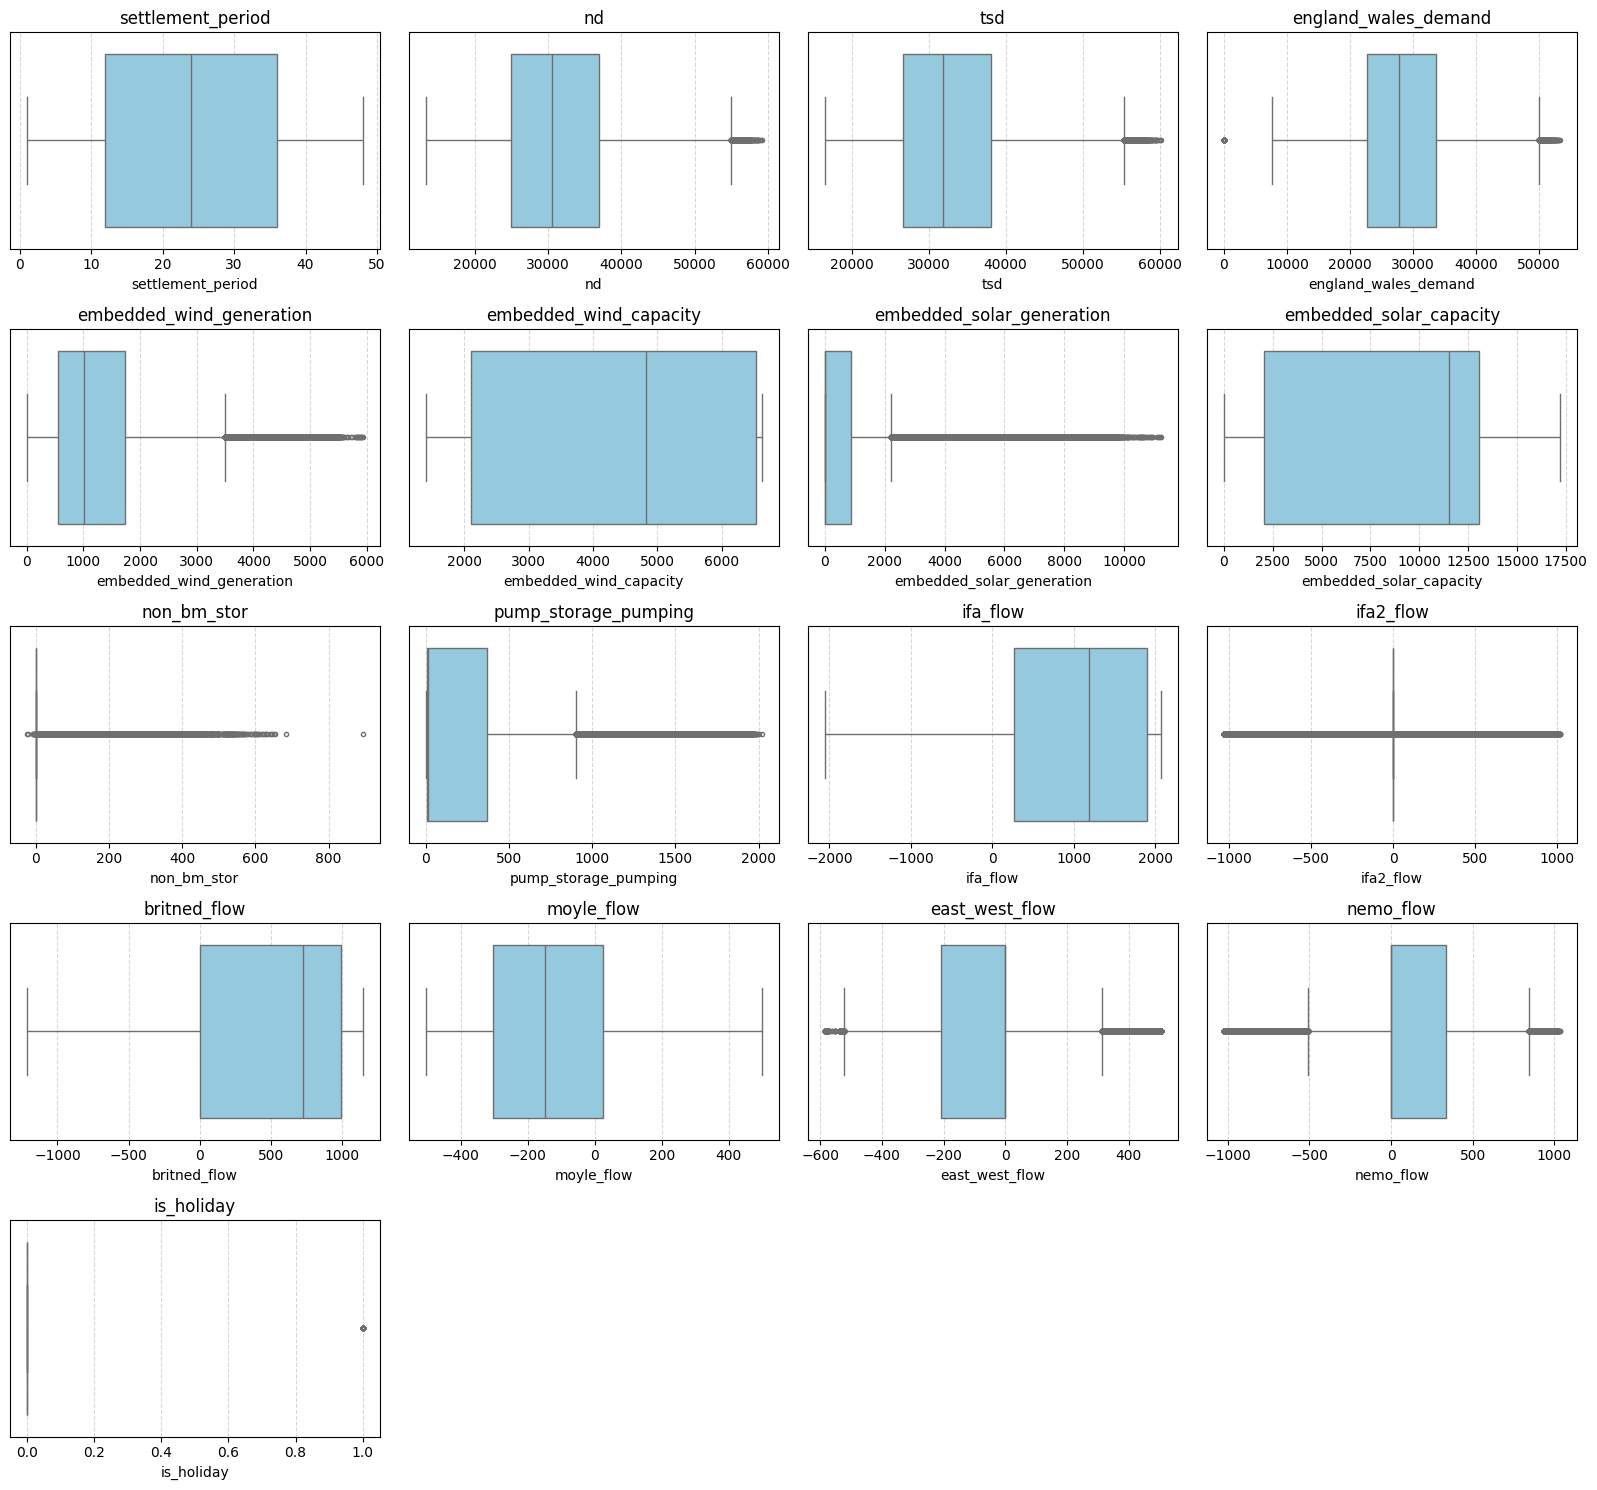

In [ ]:
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), sharex=False)

for idx, col in enumerate(numeric_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    sns.boxplot(x=df[col], ax=ax, color='skyblue', fliersize=3)
    ax.set_title(col, fontsize=12)
    ax.set_yticks([])
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)


for idx in range(len(numeric_cols), n_rows * n_cols): 
    col_idx = idx % n_cols
    axes[row, col_idx].axis('off')

plt.tight_layout()
plt.show()

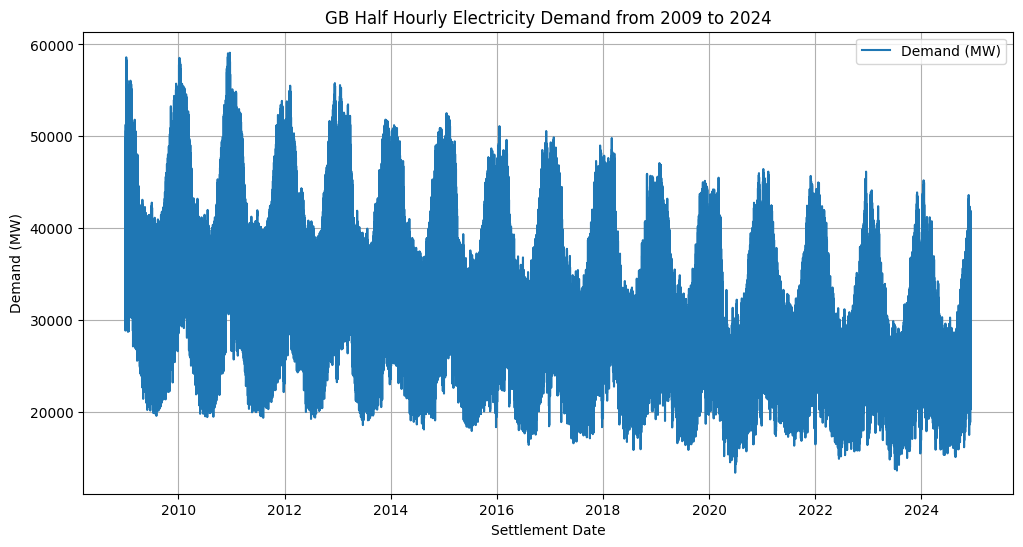

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(df['settlement_date'], df['nd'], label='Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Half Hourly Electricity Demand from 2009 to 2024')
plt.legend()
plt.grid()
plt.show()

looking at demand between 2023 and 2024

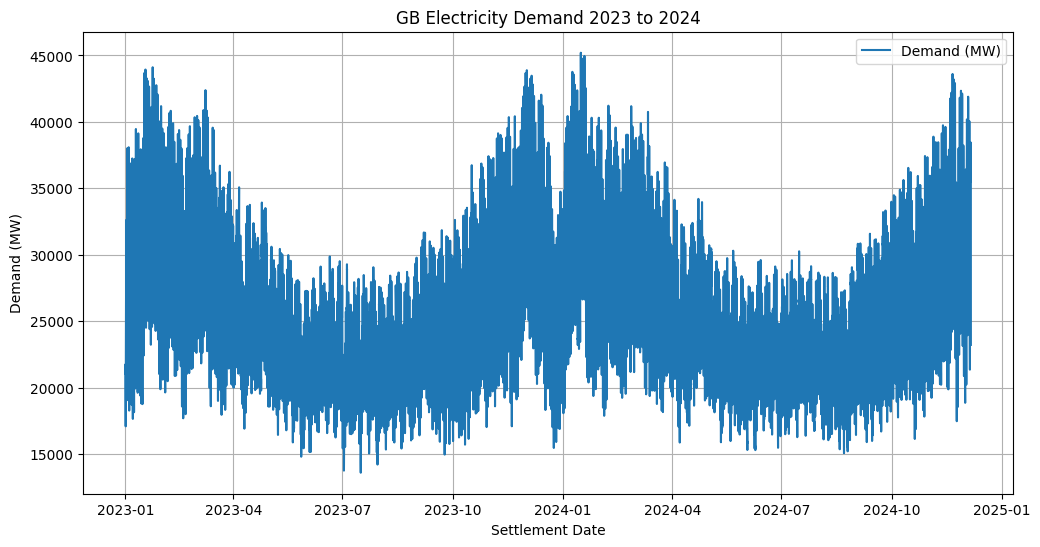

In [106]:
filtered_df = df[(df['settlement_date'].dt.year == 2023) | (df['settlement_date'].dt.year == 2024)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['settlement_date'], filtered_df['nd'], label='Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Electricity Demand 2023 to 2024')
plt.legend()
plt.grid()
plt.show()

In [107]:
df['period_hour'] = pd.to_datetime(df['period_hour'], format='%H:%M:%S').dt.time

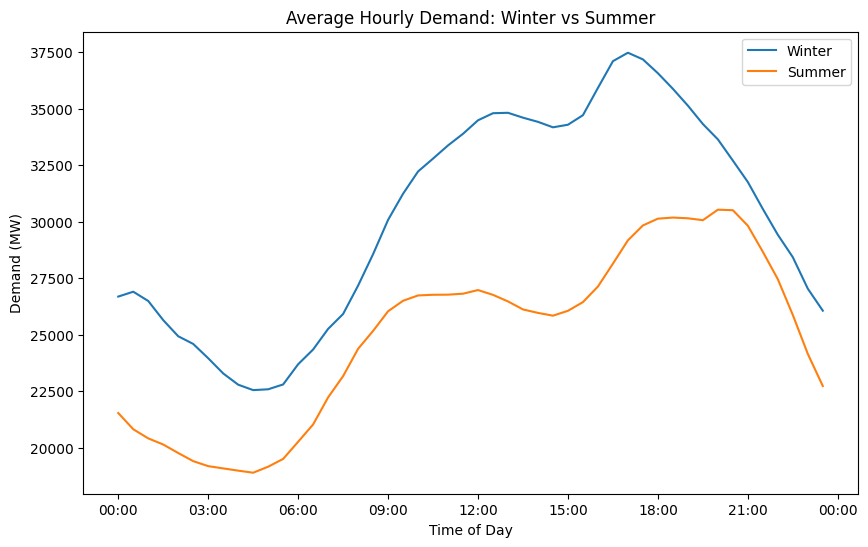

In [ ]:
holiday_df = df[df['is_holiday'] == 1]

winter_df = holiday_df[holiday_df['settlement_date'].dt.month.isin([12, 1, 2])] #filtering 
summer_df = holiday_df[holiday_df['settlement_date'].dt.month.isin([6, 7, 8])]

avg_winter_df = winter_df.groupby('period_hour')['nd'].mean().to_frame().reset_index() #grouping by period hour and taking mean
avg_summer_df = summer_df.groupby('period_hour')['nd'].mean().to_frame().reset_index()

avg_winter_df['period_hour'] = pd.to_datetime(avg_winter_df['period_hour'], format='%H:%M:%S') # converting back to datetime
avg_summer_df['period_hour'] = pd.to_datetime(avg_summer_df['period_hour'], format='%H:%M:%S')


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(avg_winter_df['period_hour'], avg_winter_df['nd'], label='Winter')
ax.plot(avg_summer_df['period_hour'], avg_summer_df['nd'], label='Summer')


ax.set_xlabel("Time of Day")
ax.set_ylabel("Demand (MW)")
ax.set_title("Average Hourly Demand: Winter vs Summer")
ax.legend()


ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

plt.show()



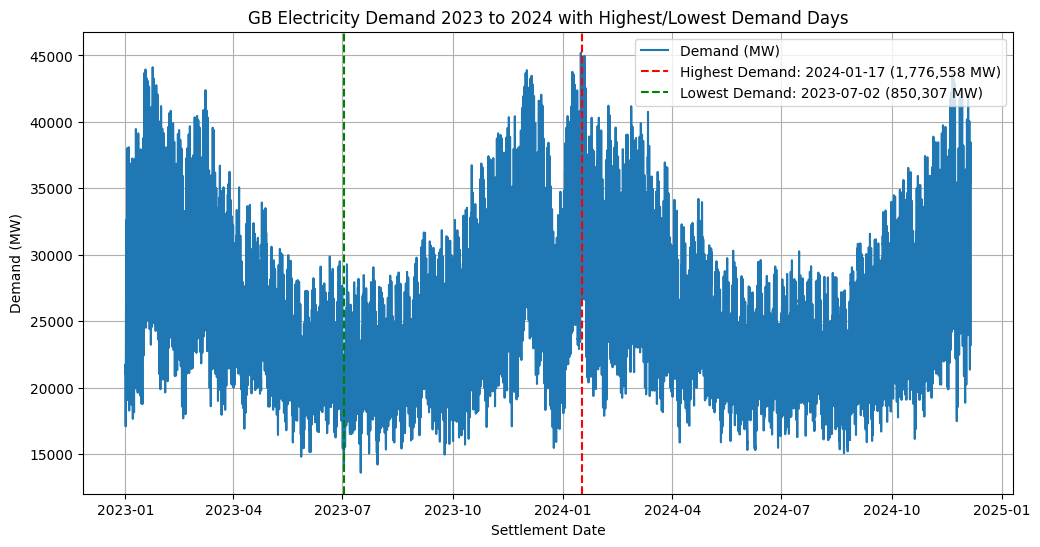

In [134]:
daily_demand = filtered_df.groupby(filtered_df['settlement_date'].dt.date)['nd'].sum() # finding daily demand by grouping by date and summing demand
max_day = daily_demand.idxmax()
min_day = daily_demand.idxmin()
max_demand = daily_demand[max_day]
min_demand = daily_demand[min_day]

# Plot demand with vertical lines for highest and lowest demand days
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['settlement_date'], filtered_df['nd'], label='Demand (MW)')
plt.axvline(pd.Timestamp(max_day), color='red', linestyle='--',
            label=f'Highest Demand: {max_day} ({max_demand:,} MW)')
plt.axvline(pd.Timestamp(min_day), color='green', linestyle='--',
            label=f'Lowest Demand: {min_day} ({min_demand:,} MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Electricity Demand 2023 to 2024 with Highest/Lowest Demand Days')
plt.legend()
plt.grid()
plt.show()

looking at renewable generation

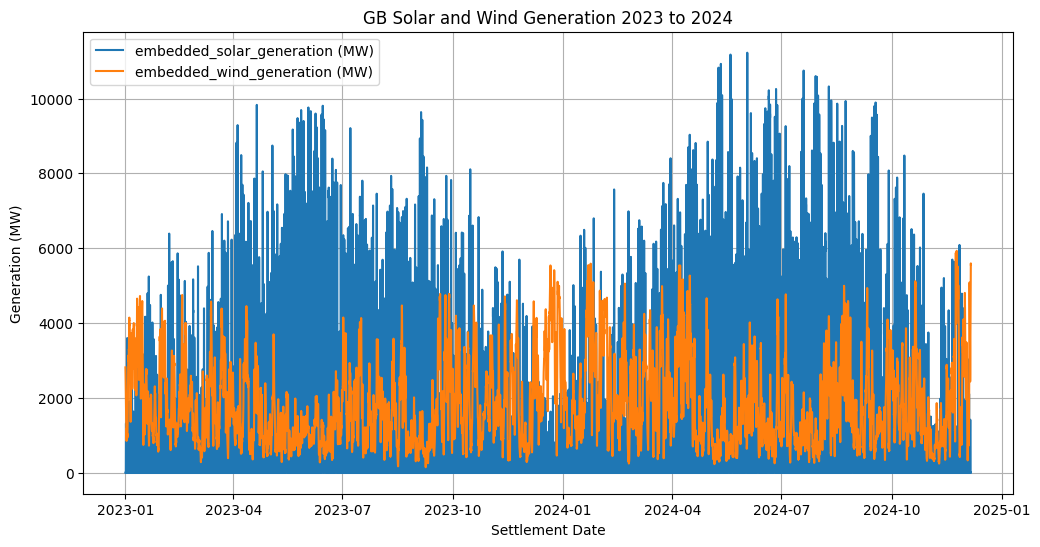

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['settlement_date'], filtered_df['embedded_solar_generation'], label='embedded_solar_generation (MW)')
plt.plot(filtered_df['settlement_date'], filtered_df['embedded_wind_generation'], label='embedded_wind_generation (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Generation (MW)')
plt.title('GB Solar and Wind Generation 2023 to 2024')
plt.legend()
plt.grid()
plt.show()

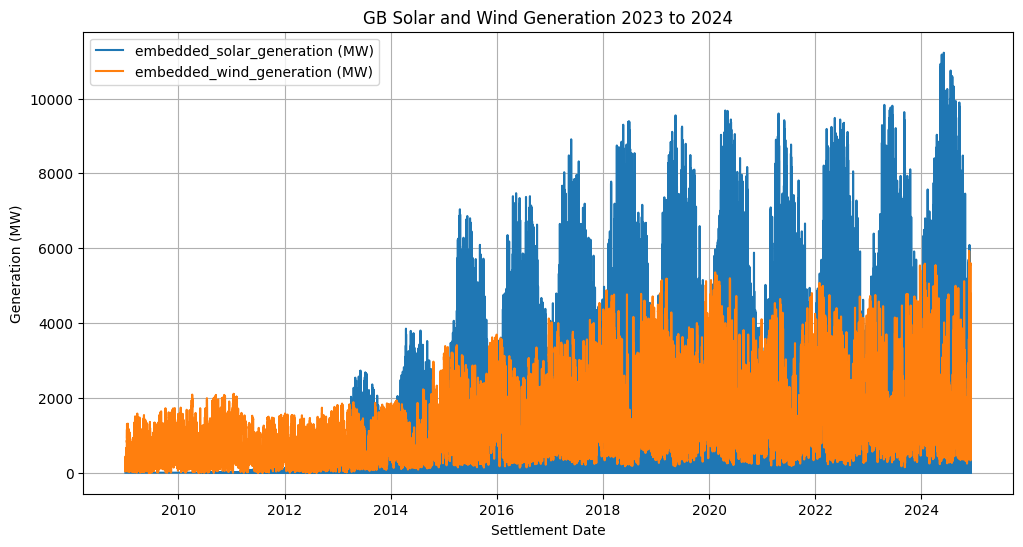

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(df['settlement_date'], df['embedded_solar_generation'], label='embedded_solar_generation (MW)')
plt.plot(df['settlement_date'], df['embedded_wind_generation'], label='embedded_wind_generation (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Generation (MW)')
plt.title('GB Solar and Wind Generation 2023 to 2024')
plt.legend()
plt.grid()
plt.show()


resampling the df

In [112]:
resampled_df = df.set_index('settlement_date')['nd'].resample('D').sum()
resampled_df = resampled_df.dropna().to_frame()




appears to be zero values which dont make sense as a country cannot have 0MW of demand on any given day

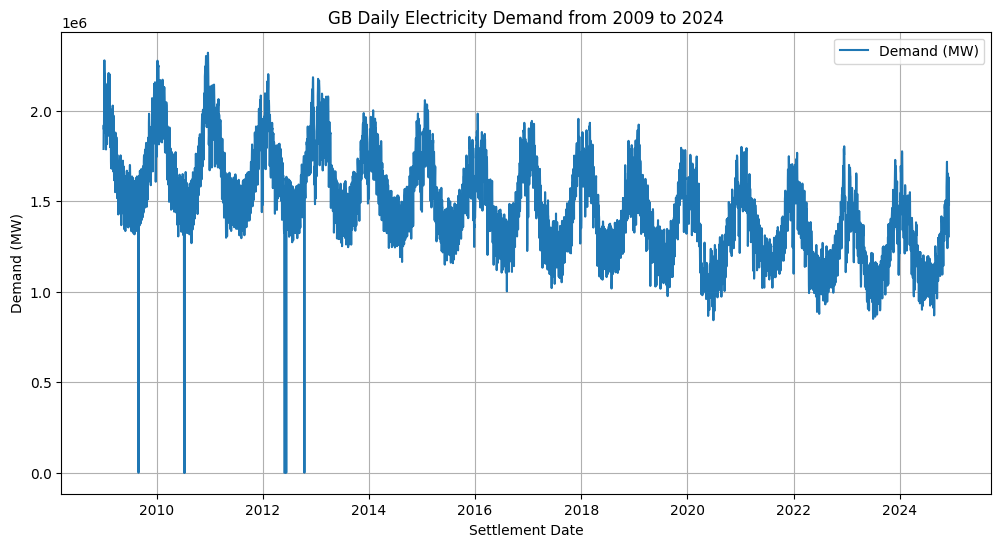

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(resampled_df.index, resampled_df['nd'], label='Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Daily Electricity Demand from 2009 to 2024')
plt.legend()
plt.grid()
plt.show()


In [114]:
resampled_df[resampled_df['nd']==0]


,nd
settlement_date,
2009-08-29,0
2009-08-30,0
2010-07-09,0
2010-07-10,0
2010-07-13,0
2010-07-14,0
2012-05-29,0
2012-05-30,0
2012-05-31,0


autocorrelation plots: 

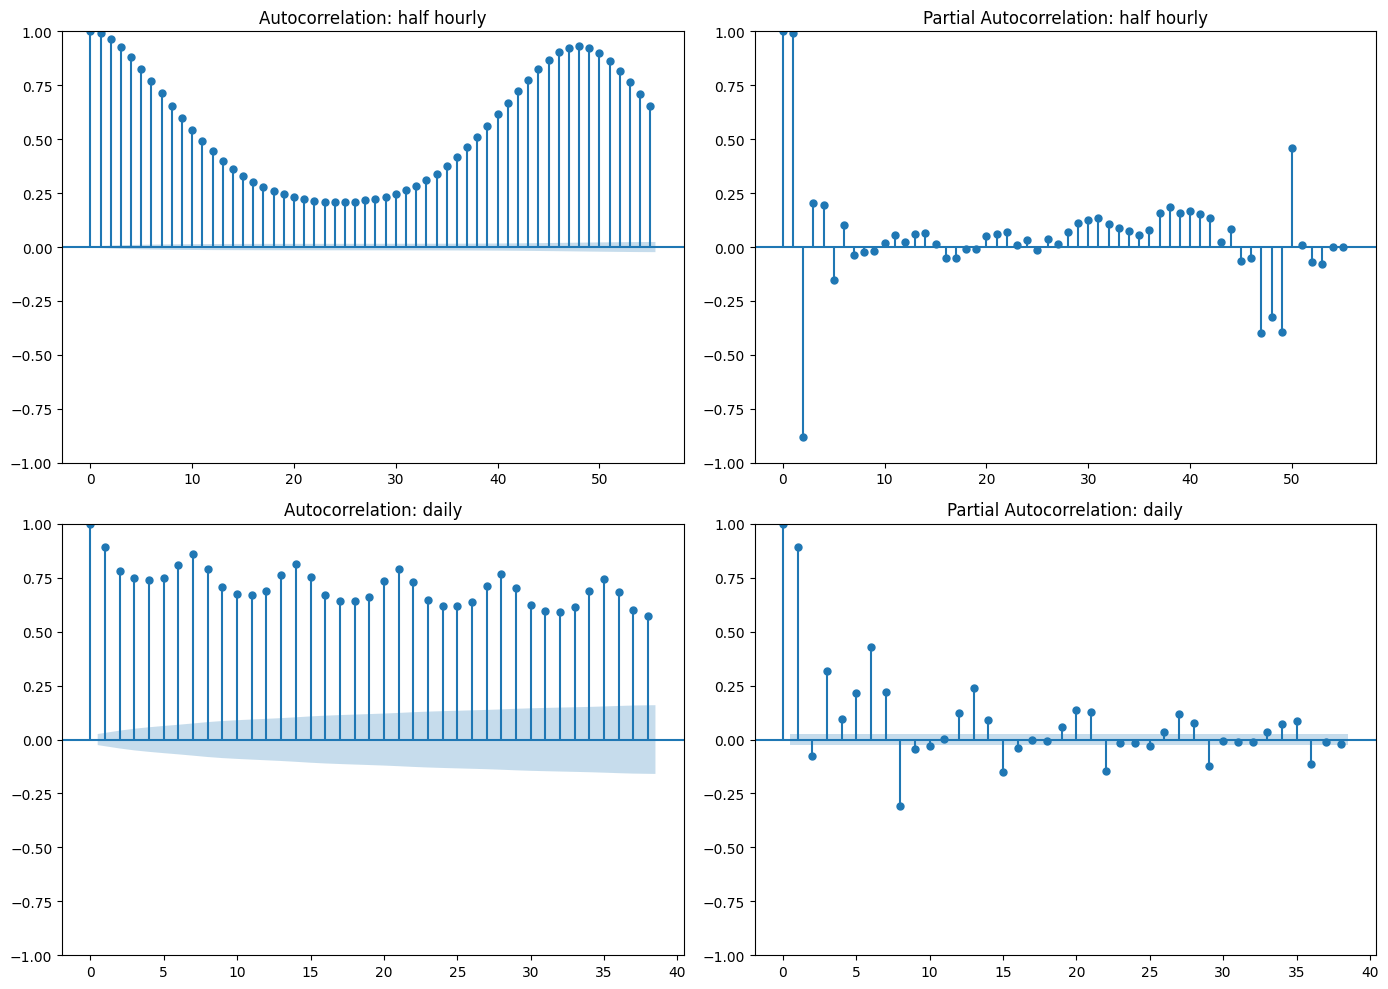

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))


plot_acf(df['nd'], ax=axs[0, 0])
axs[0, 0].set_title('Autocorrelation: half hourly')

plot_pacf(df['nd'], ax=axs[0, 1])
axs[0, 1].set_title('Partial Autocorrelation: half hourly')

plot_acf(resampled_df['nd'], ax=axs[1, 0])
axs[1, 0].set_title('Autocorrelation: daily')

plot_pacf(resampled_df['nd'], ax=axs[1, 1])
axs[1, 1].set_title('Partial Autocorrelation: daily')

plt.tight_layout()
plt.show()

# Data Preparation and Preprocessing

In [116]:
missing_data_df = resampled_df[(resampled_df.index >= pd.to_datetime("2012-05-01 00:00:00")) & (resampled_df.index <= pd.to_datetime("2012-06-30 00:00:00"))]
missing_data_df

,nd
settlement_date,
2012-05-01,1753707
2012-05-02,1752587
2012-05-03,1789842
2012-05-04,1753713
2012-05-05,1565313
...,...
2012-06-26,1608725
2012-06-27,1621718
2012-06-28,1620323


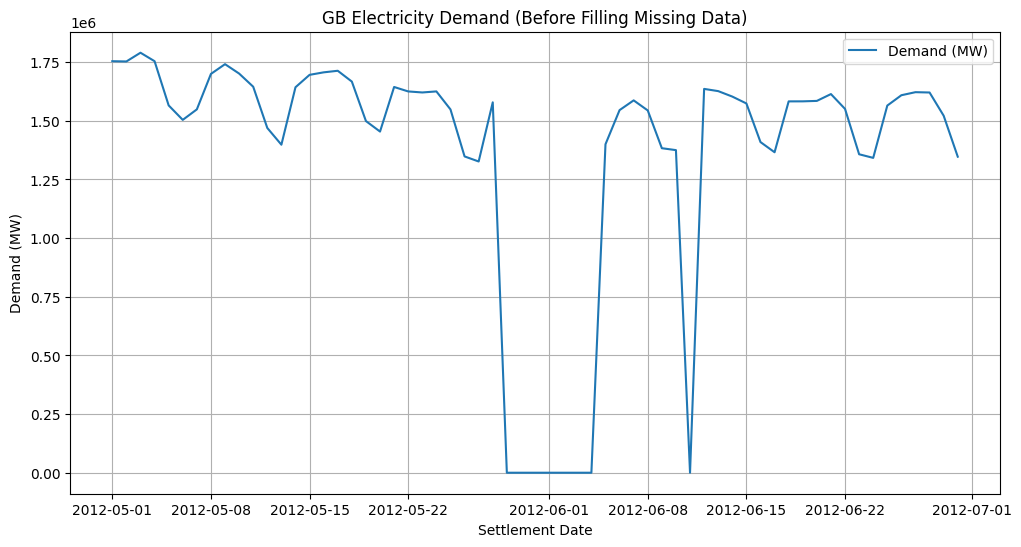

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(missing_data_df.index, missing_data_df['nd'], label='Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Electricity Demand (Before Filling Missing Data)')
plt.legend()
plt.grid()
plt.show()

function for forward filling: 

In [118]:
def fill_zeros_up_to_n_days(ts, n_days):
    """
    Fill consecutive zero values in a time series using the previous `n_days` of values,
    even if the zero block is shorter than n_days.
    
    Parameters:
        ts (pd.Series): Time series with datetime index
        n_days (int): Number of previous days to use to fill zero values
    
    Returns:
        pd.Series: Time series with zero values filled
    """
    ts_values = ts.values.copy()
    i = 0
    while i < len(ts_values):
        if ts_values[i] == 0:  # checking for zero values
            count = 0 # couning consecutive zeros
            while i + count < len(ts_values) and ts_values[i + count] == 0:
                count += 1
            prev_block = ts_values[max(0, i - n_days):i] #taking preceding n_days values
            if len(prev_block) > 0 and not np.any(prev_block == 0):
                ts_values[i:i+count] = prev_block[:count] # filling the zero block with preceding values
            i += count
        else:
            i += 1
    return pd.Series(ts_values, index=ts.index)
    

In [119]:
filled_resample_df = fill_zeros_up_to_n_days(resampled_df['nd'], 7).to_frame('nd')
filled_resample_df

,nd
settlement_date,
2009-01-01,1789321
2009-01-02,1920721
2009-01-03,1897691
2009-01-04,1911407
2009-01-05,2181646
...,...
2024-12-01,1302096
2024-12-02,1501840
2024-12-03,1632662


In [120]:
filled_missing_data = filled_resample_df[(filled_resample_df.index >= pd.to_datetime("2012-05-01 00:00:00")) & (filled_resample_df.index <= pd.to_datetime("2012-06-30 00:00:00"))]

graph after filling missing data: 

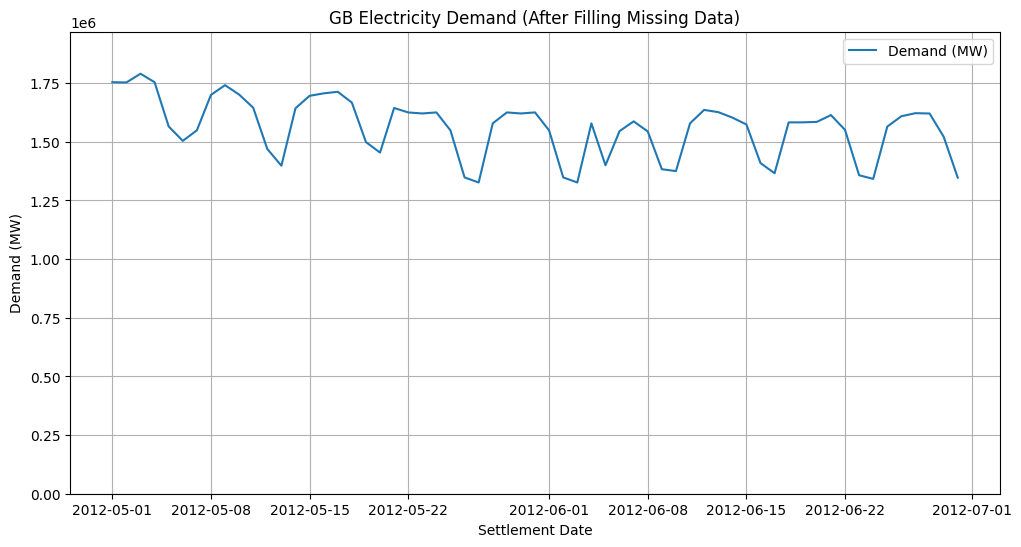

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(filled_missing_data.index, filled_missing_data['nd'], label='Demand (MW)')
plt.ylim(0, filled_missing_data['nd'].max() * 1.1)  # Set y-axis limit to avoid distortion
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Electricity Demand (After Filling Missing Data)')
plt.legend()
plt.grid()
plt.show()

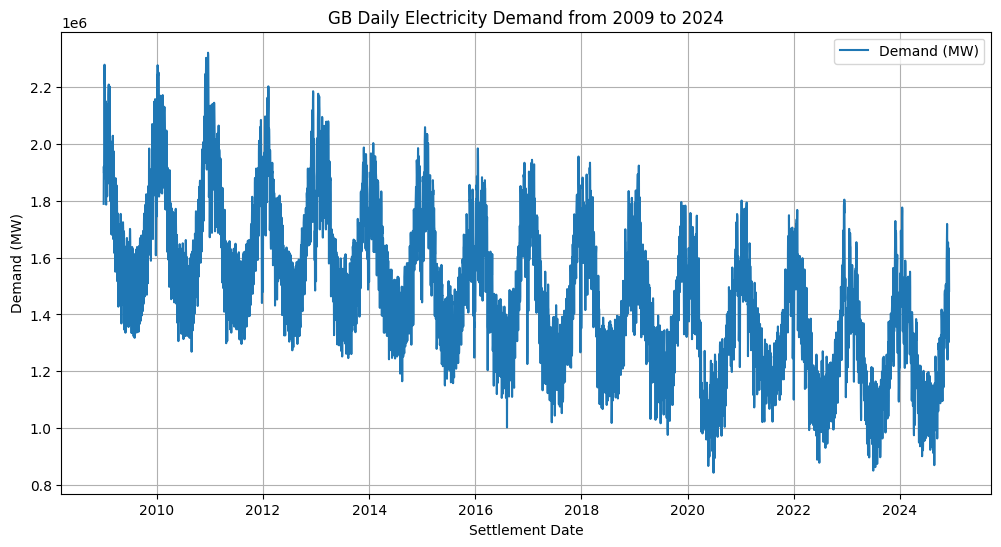

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(filled_resample_df.index, filled_resample_df['nd'], label='Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Daily Electricity Demand from 2009 to 2024')
plt.legend()
plt.grid()
plt.show()

In [ ]:
adf_result = adfuller(filled_resample_df['nd'])
print('ADF Statistic:', adf_result[0]) #the more negative the adf stat the more likely it is stationary
print('p-value:', adf_result[1]) #if p-value is less than 0.05 then it is stationary
print('number of lags used:', adf_result[2])
print('number of observations used:', adf_result[3])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.493400042283875
p-value: 0.00815822163600167
number of lags used: 34
number of observations used: 5783
Critical Values:
   1%: -3.4314812822100733
   5%: -2.862039919305413
   10%: -2.567036105089754


In [ ]:
# Add day of week and weekend/weekday features
filled_resample_df['day_of_week'] = filled_resample_df.index.dayofweek  # Monday=0, Sunday=6
filled_resample_df['is_weekend'] = filled_resample_df['day_of_week'].isin([5, 6]).astype(int)  # 1 if weekend, 0 if weekday


filled_resample_df['rolling_mean'] = filled_resample_df['nd'].rolling(window=7, min_periods=1).mean() #rolling for 7 days
filled_resample_df['rolling_std'] = filled_resample_df['nd'].rolling(window=7, min_periods=1).std()

filled_resample_df.head(10)

,nd,day_of_week,is_weekend,rolling_mean,rolling_std,rolling_min,rolling_max
settlement_date,,,,,,,
2009-01-01,1789321,3,0,1.789321e+06,NaN,1789321.0,1789321.0
2009-01-02,1920721,4,0,1.855021e+06,92913.831048,1789321.0,1920721.0
2009-01-03,1897691,5,1,1.869244e+06,70166.941171,1789321.0,1920721.0
2009-01-04,1911407,6,1,1.879785e+06,61046.613643,1789321.0,1920721.0
2009-01-05,2181646,0,0,1.940157e+06,144979.410408,1789321.0,2181646.0
2009-01-06,2266786,1,0,1.994595e+06,186000.768059,1789321.0,2266786.0
2009-01-07,2279143,2,0,2.035245e+06,200990.064181,1789321.0,2279143.0
2009-01-08,2216076,3,0,2.096210e+06,177287.973651,1897691.0,2279143.0
2009-01-09,2206286,4,0,2.137005e+06,162407.340807,1897691.0,2279143.0


In [130]:
processed_df = filled_resample_df.copy()
processed_df

,nd,day_of_week,is_weekend,rolling_mean,rolling_std,rolling_min,rolling_max
settlement_date,,,,,,,
2009-01-01,1789321,3,0,1.789321e+06,NaN,1789321.0,1789321.0
2009-01-02,1920721,4,0,1.855021e+06,92913.831048,1789321.0,1920721.0
2009-01-03,1897691,5,1,1.869244e+06,70166.941171,1789321.0,1920721.0
2009-01-04,1911407,6,1,1.879785e+06,61046.613643,1789321.0,1920721.0
2009-01-05,2181646,0,0,1.940157e+06,144979.410408,1789321.0,2181646.0
...,...,...,...,...,...,...,...
2024-12-01,1302096,6,1,1.482569e+06,148823.939687,1302096.0,1653364.0
2024-12-02,1501840,0,0,1.499637e+06,142115.934635,1302096.0,1653364.0
2024-12-03,1632662,1,0,1.510439e+06,149869.021767,1302096.0,1653364.0


In [ ]:
processed_df.to_csv('data/processed_demand_data.csv') # saving processed data
